# ALP Data Mining 2022

## Introduction

Data yang akan diolah kali ini adalah dataset dari terapi kelenjar getah bening. Kita akan mengolahnya dalam 2 model yaitu Classification, dan Clustering

### Import library

Melakukan import pada library yang akan digunakan dalam proses data mining

In [425]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn
import statistics
from sklearn.linear_model import LinearRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import mean_absolute_percentage_error

### Impot dataset

Melakukan import pada dataset yang sudah disediakan dan akan digunakan

In [426]:
url = 'https://raw.githubusercontent.com/christophertekvi/Dataset/main/Dataset_Terapi_Kelenjar_Getah_Bening.csv'
df = pd.read_csv(url)
df

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,1,15,11.00,6.0,1.0,30,25.0,0
1,1,27,11.75,NaN,1.0,208,6.0,0
2,1,32,12.00,9.0,1.0,43,50.0,0
3,1,33,1.75,7.0,2.0,379,7.0,0
4,1,34,5.00,7.0,3.0,64,7.0,0
...,...,...,...,...,...,...,...,...
85,2,51,4.00,1.0,1.0,65,7.0,1
86,2,51,6.00,6.0,NaN,80,2.0,1
87,2,52,2.25,5.0,1.0,63,7.0,1
88,2,53,10.00,1.0,2.0,30,25.0,1


Didapatkan ada 8 kolom dan 90 baris. Dataset yang diberikan merupakan dataset yang sudah di encoding jadi kita tidak perlu untuk melakukan encoding terlebih dahulu. Tetapi kita juga kurang bisa untuk membaca dataset ini dengan baik karena value dari dataset ini sduah dalam bentuk angka.

gender = jenis kelamin pasien

age = usia pasien

Time = Waktu perawatan

Number_of_Warts = jumlah benjolan pada pasien

Type = tipe benjolan pada pasien

induration_diameter = diameter benjolan pada pasien

Result_of_Treatment = hasil perawatan

## Data Preparation

Kita perlu untuk melakukan EDA (Exploratory Data Analyis) untuk mengetahui data yang akan kita gunakan dalam proses kali ini sudah siap. Tidak boleh ada data duplikasi, data yang kosong, dan lain-lain.

### Cek infomasi data

In [427]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               90 non-null     int64  
 1   age                  90 non-null     int64  
 2   Time                 87 non-null     float64
 3   Number_of_Warts      89 non-null     float64
 4   Type                 85 non-null     float64
 5   Area                 90 non-null     int64  
 6   induration_diameter  88 non-null     float64
 7   Result_of_Treatment  90 non-null     int64  
dtypes: float64(4), int64(4)
memory usage: 5.8 KB


### Cek data duplikasi

In [428]:
df.duplicated().sum()

0

### Heatmap Korelasi

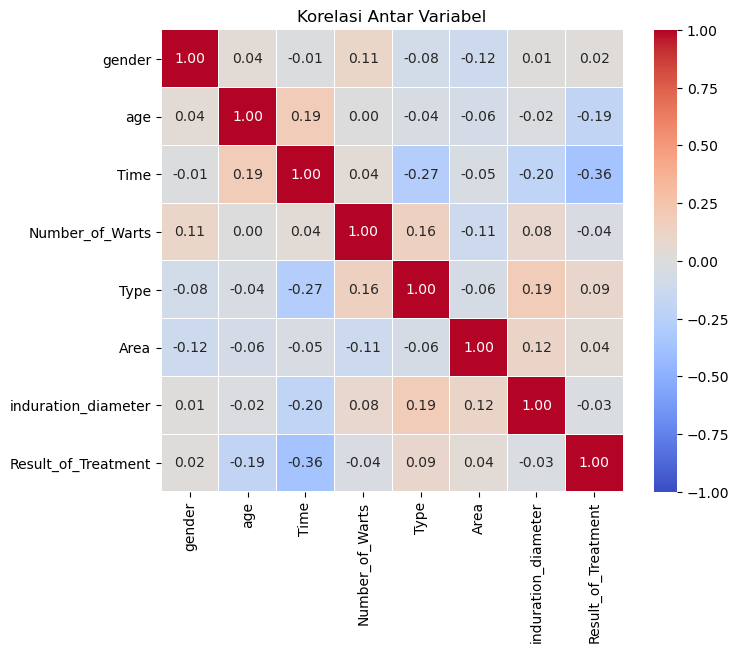

In [429]:
corr = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, vmin=-1, vmax=1, cmap = "coolwarm", annot=True, fmt='.2f', linewidths=0.1, square = True)
plt.title("Korelasi Antar Variabel")
plt.show()

### Cek data yang kosong

In [430]:
df.isna().sum()

gender                 0
age                    0
Time                   3
Number_of_Warts        1
Type                   5
Area                   0
induration_diameter    2
Result_of_Treatment    0
dtype: int64

Karena ada data yang kosong maka kita perlu untuk melakukan tindakan terhadap data kosong tersebut, karena proses data mining tidak boleh terdapat data yang kosong atau NaN value karena nanti aka menggangu proses yang akan dilakukan. Karena data yang diberikan hanya memiliki 90 baris maka kita tidak boleh untuk melakukan droping data atau menghapus data karena jika data yang akan diolah berjumlah sedikit tingkat keakurasian tidak bisa diukur dengan valid. Maka kita akan melakukan proses pengisian pada data yang kosong tersebut.

Time akan diisi dengan metode linear regression yang menggunakan parameter age sebagai variabel pendukung karena korelasi dengan age paling tinggi.

Number_of_Warts akan diisi dengan modus atau nilai yang sering muncul

Type akan diisi dengan metode linear regression yang menggunakan parameter age sebagai variabel pendukung karena korelasi dengan induration_diameter paling tinggi.

induration_diameter akan diisi dengan mean atau rata-rata

### Isi data yang null

Isi Time

In [431]:
df_time = df.dropna(axis=0,subset=['Time','age'])
df_time = df_time.loc[:, ['Time','age']]
miss_time = df['Time'].isna()
age_misstime = pd.DataFrame(df['age'][miss_time])

In [432]:
X = df_time[['age']]
y = df_time['Time']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,random_state=42)

y_train.shape
lr = LinearRegression()
lr.fit(X_train,y_train)

time_pred = lr.predict(age_misstime)
n = np.round(time_pred,2)

In [433]:
missvalue = df['Time'].isna()
df.loc[missvalue,'Time'] = n

Isi Number_of_Warts

In [434]:
df['Number_of_Warts'] = df['Number_of_Warts'].fillna(df['Number_of_Warts'].mode()[0])

Isi Type

In [435]:
df_type = df.dropna(axis=0,subset=['Type','induration_diameter'])
df_type = df_type.loc[:, ['Type','induration_diameter']]
miss_type = df['Type'].isna()
indu_type = pd.DataFrame(df['induration_diameter'][miss_type])

In [436]:
X = df_type[['induration_diameter']]
y = df_type['Type']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,random_state=42)

from sklearn.linear_model import LinearRegression

y_train.shape
lr = LinearRegression()
lr.fit(X_train,y_train)

type_pred = lr.predict(indu_type)
n = np.round(type_pred,0)

In [437]:
missvalue = df['Type'].isna()
df.loc[missvalue,'Type'] = n

Isi induration_diameter

In [438]:
df['induration_diameter'] = df['induration_diameter'].fillna(df['induration_diameter'].mean())

Cek apakah sudah terisi semua

In [439]:
df.isna().sum()

gender                 0
age                    0
Time                   0
Number_of_Warts        0
Type                   0
Area                   0
induration_diameter    0
Result_of_Treatment    0
dtype: int64

In [440]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               90 non-null     int64  
 1   age                  90 non-null     int64  
 2   Time                 90 non-null     float64
 3   Number_of_Warts      90 non-null     float64
 4   Type                 90 non-null     float64
 5   Area                 90 non-null     int64  
 6   induration_diameter  90 non-null     float64
 7   Result_of_Treatment  90 non-null     int64  
dtypes: float64(4), int64(4)
memory usage: 5.8 KB


Kita perlu untuk merubah tipe data karena pada Number_of_Warts, Type, dan induration_diameter menggunakan bilangan bulat maka kita hanya perlu memakai integer saja.

In [441]:
df[['Number_of_Warts', 'Type', 'induration_diameter']] = df[['Number_of_Warts', 'Type', 'induration_diameter']].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               90 non-null     int64  
 1   age                  90 non-null     int64  
 2   Time                 90 non-null     float64
 3   Number_of_Warts      90 non-null     int64  
 4   Type                 90 non-null     int64  
 5   Area                 90 non-null     int64  
 6   induration_diameter  90 non-null     int64  
 7   Result_of_Treatment  90 non-null     int64  
dtypes: float64(1), int64(7)
memory usage: 5.8 KB


### Cek Imbalance

C:\Users\chris\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Result_of_Treatment', ylabel='count'>

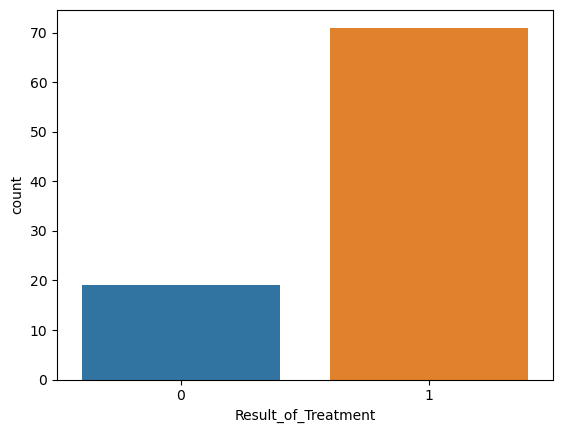

In [442]:
sns.countplot(df['Result_of_Treatment'])

karena ada ketimpangan data antara satu dengan lainnya maka kita perlu untuk menyeimbangkan data menggunakan metode oversample smote

In [443]:
X = df[['gender', 'age', 'Number_of_Warts', 'Area', 'induration_diameter','Type', 'Time']]
y = df['Result_of_Treatment']
oversample = SMOTE(random_state = 0)
X_smote, y_smote = oversample.fit_resample(X, y)
df2 = pd.DataFrame(X_smote)
df2["Result_of_Treatment"] = y_smote

In [444]:
df2.duplicated().sum()

0

C:\Users\chris\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Result_of_Treatment', ylabel='count'>

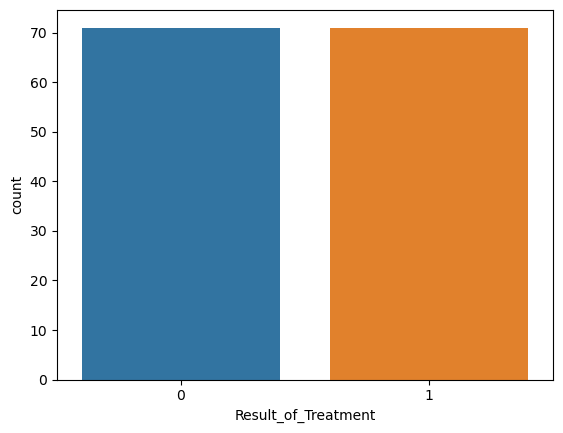

In [445]:
sns.countplot(df2['Result_of_Treatment'])

Karena data sudah seimbang dan sudah siap untuk digunakan dalam metode machine learning kita akan melakukan Classification, Clustering, dan Association Rule Mining

# Classification

Pisahkan dataset menjadi variabel independen dan variabel dependen

In [446]:
X = df2.iloc[:,:-1].values
y = df2.iloc[:,-1].values

Pisahkan dataset train dan test dataset, dengan ukuran dataset test 0.1

In [447]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

Scaling pada variabel X_train dan X_test

In [448]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Logistic Regression

Bangun model dan ukur accuracy nya

In [449]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

classifier = LogisticRegression(random_state=42)
classifier.fit(X_train, y_train)
x_pred = classifier.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test, x_pred))

Accuracy Score:  0.6


Uji model dengan dataset test

In [450]:
y_pred = classifier.predict(X_test)
print(y_pred)

[0 1 0 0 0 0 1 1 1 0 0 0 1 1 0]


In [451]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n", cm)
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Confusion Matrix
 [[5 2]
 [4 4]]
Accuracy Score:  0.6


### Naive Bayes

Buat model persamaan berdasarkan data training yang sudah dibuat pada tahap preprocess

In [452]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

Uji hasil model dengan data test

In [453]:
y_pred = classifier.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 1 0 1 0 0 0 0 1 0]


Ukur akurasi dari model persamaan Naive Bayes Classifier

In [454]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n", cm)
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Confusion Matrix
 [[6 1]
 [6 2]]
Accuracy Score:  0.5333333333333333


### K-Nearest Neighbour (K-NN) Classifier

Membuat model KNN berdasarkan data training yang sudah dibuat di tahap preprocess, mengunakan metric pengukuran jarak 'euclidean'

In [455]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 5, metric="euclidean")
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

Uji model dengan data test

In [456]:
y_pred = classifier.predict(X_test)
print(y_pred)

[0 1 1 0 0 0 0 0 0 0 0 1 1 1 1]


Ukur akurasi dari model K-Nearest Neighbor

In [457]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n", cm)
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Confusion Matrix
 [[6 1]
 [3 5]]
Accuracy Score:  0.7333333333333333


### Kesimpulan

Dari 3 model klasifikasi di atas (Logistic Regression, Naive Bayes, K-Nearest Neighbor) model klasifikasi dengan akurasi tertinggi adalah K-Nearest Neighbor

# Clustering

Selanjutnya kita akan melakukan clustering dengan data yang sama tetapi tidak akan memasukkan kolom terakhir karena dalam proses clustering tidak akan melibatkan kolom target atribut

In [458]:
df_cluster = df2.iloc[:,:-1]
df_cluster

,gender,age,Number_of_Warts,Area,induration_diameter,Type,Time
0,1,15,6,30,25,1,11.000000
1,1,27,2,208,6,1,11.750000
2,1,32,9,43,50,1,12.000000
3,1,33,7,379,7,2,1.750000
4,1,34,7,64,7,3,5.000000
...,...,...,...,...,...,...,...
137,1,31,6,59,7,2,6.748907
138,1,42,8,89,17,1,11.707131
139,2,40,10,21,5,2,11.064147
140,1,34,10,88,6,1,11.692472


Sebelum kita menganalisis data kita, kita perlu menskalakan data dengan metode standarisasi

In [459]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=['gender', 'age','Number_of_Warts','Area','induration_diameter','Type','Time'])
df_scaled.head()

,gender,age,Number_of_Warts,Area,induration_diameter,Type,Time
0,-0.91878,-1.599414,-0.031455,-0.514910,0.730881,-0.817572,0.949229
1,-0.91878,-0.492877,-1.082426,1.057883,-0.495436,-0.817572,1.188223
2,-0.91878,-0.031819,0.756773,-0.400043,2.344456,-0.817572,1.267888
3,-0.91878,0.060392,0.231288,2.568825,-0.430893,0.548254,-1.998367
4,-0.91878,0.152603,0.231288,-0.214489,-0.430893,1.914081,-0.962725


## K-MEANS Clustering

Membangun model K-Means untuk proses clustering

In [460]:
from sklearn.cluster import KMeans

kmeans = KMeans(init="random",n_clusters=3,max_iter=300,random_state=42)

model = kmeans.fit_predict(df_scaled)
model
df_cluster['K-MEANS'] = model
df_cluster

C:\Users\chris\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,gender,age,Number_of_Warts,Area,induration_diameter,Type,Time,K-MEANS
0,1,15,6,30,25,1,11.000000,2
1,1,27,2,208,6,1,11.750000,2
2,1,32,9,43,50,1,12.000000,2
3,1,33,7,379,7,2,1.750000,1
4,1,34,7,64,7,3,5.000000,1
...,...,...,...,...,...,...,...,...
137,1,31,6,59,7,2,6.748907,2
138,1,42,8,89,17,1,11.707131,2
139,2,40,10,21,5,2,11.064147,0
140,1,34,10,88,6,1,11.692472,2


Melakukan pengujian cluster menggunakan elbow

C:\Users\chris\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\chris\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\chris\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\chris\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Window

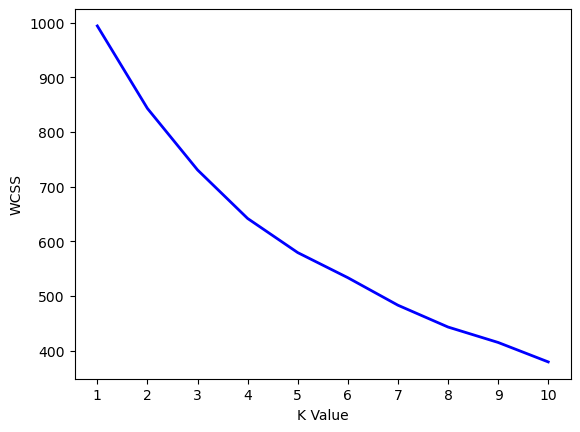

In [461]:
from matplotlib import pyplot as plt
wcss=[]
X2=df_scaled
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="random")
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)  
plt.plot(range(1,11),wcss, linewidth=2, color="blue")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [462]:
from kneed import KneeLocator
findknee = KneeLocator(range(1,11), wcss, curve="convex",direction="decreasing")
print("The best K Value for you model is", findknee.elbow)

The best K Value for you model is 4


Dataset ini bisa diklasifikasikan terhadap 4 kluster.